# Intro

In this example, we take the orientations we calculated in part 1 and express them as orientation distribution functions on a basis of real, even spherical harmonic functions. 

We start by importing some base packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

And load our data from earlier:

In [2]:
phantom = np.load('phantom.npy')
vectors = np.load('vectors.npy')

# Fit to ODF

ODFs are constructed using the `ODF` class. This takes an array of vectors and bins them into a single spherical function up to a real, even spherical harmonic degree given by `degree`. There are three methods of constructing the ODF:

`method = 'delta'` : Computes the analytic ODF by representing the vectors as a sum of delta functions. Computationally expensive. 

`method = N` : Computes an estimate of the ODF by first binning the vectors into a spherical histogram with `N` bins. 

`method='precompute'` : Computes an estimate of the ODF by using precomputed spherical harmonic functions evaluated on 6500 points used for histogram binning. Fastest. 

In [3]:
import numpy as np
from fiberorient.odf import ODF

odf = ODF(degree=8,method='precompute').fit(vectors)

Results are stored as an array of spherical harmonic coefficients:

In [4]:
odf.coef

array([ 0.28209479,  0.00915802,  0.09778944,  0.08632422,  0.00270399,
       -0.09234878,  0.1917387 ,  0.0391476 ,  0.04681387, -0.00319913,
        0.07760949,  0.06370277, -0.07454529,  0.15032999, -0.00872516,
       -0.05011649, -0.05642025, -0.07282747,  0.00186762, -0.06989595,
        0.09135394, -0.09724677,  0.08636787, -0.0070395 ,  0.04057673,
        0.03829083, -0.01295764,  0.09754012,  0.43446221, -0.03134937,
       -0.01886082, -0.0089575 ,  0.07655605, -0.0026521 ,  0.0033627 ,
        0.24733922, -0.01169743,  0.10069428,  0.0889604 ,  0.00290744,
       -0.08234969,  0.02768995, -0.02240444,  0.35001998,  0.01437436])

With degree and order given by:

In [5]:
odf.mn

array([[ 0,  0],
       [ 2, -2],
       [ 2, -1],
       [ 2,  0],
       [ 2,  1],
       [ 2,  2],
       [ 4, -4],
       [ 4, -3],
       [ 4, -2],
       [ 4, -1],
       [ 4,  0],
       [ 4,  1],
       [ 4,  2],
       [ 4,  3],
       [ 4,  4],
       [ 6, -6],
       [ 6, -5],
       [ 6, -4],
       [ 6, -3],
       [ 6, -2],
       [ 6, -1],
       [ 6,  0],
       [ 6,  1],
       [ 6,  2],
       [ 6,  3],
       [ 6,  4],
       [ 6,  5],
       [ 6,  6],
       [ 8, -8],
       [ 8, -7],
       [ 8, -6],
       [ 8, -5],
       [ 8, -4],
       [ 8, -3],
       [ 8, -2],
       [ 8, -1],
       [ 8,  0],
       [ 8,  1],
       [ 8,  2],
       [ 8,  3],
       [ 8,  4],
       [ 8,  5],
       [ 8,  6],
       [ 8,  7],
       [ 8,  8]])

We can also express the ODF as a spherical function by defining a `Sphere` from the dipy package. fiberorient contains a utility function `make_sphere` to define a `Sphere` with a given number of points:

In [6]:
from fiberorient.util import make_sphere

sphere = make_sphere(6500)
odf_on_sphere = odf.to_sphere(sphere)
print(f'odf_on_sphere.shape = {odf_on_sphere.shape}')

odf_on_sphere.shape = (6500,)


# Visualization

fiberorient contains utility functions for visualizing ODFs. The first is to visualize a single ODF as calculated above. As before, this makes use of the fury package, so we will save results to a png and then display with matplotlib:

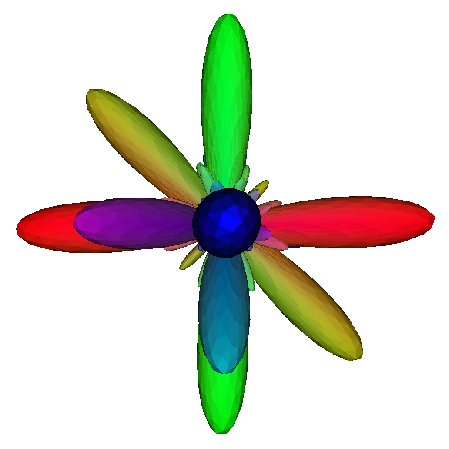

In [7]:
from fiberorient.vis import show_odf

def plot_image(img,**kwargs):
    '''Utility function to plot 2D image'''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.imshow(img, interpolation='none',**kwargs)
    ax.axis('off')
    ax.set_aspect('equal')
    return fig, ax

show_odf(odf_on_sphere,sphere,out_path='odf_on_sphere.png')
im = plt.imread('odf_on_sphere.png')
plot_image(im);

This gives us the ODF for the entire phantom image. As expected, we see six lobes corrresponding to the orientations of the six mega-voxels. 

We can also calculate separate ODFs for each mega-voxel and view them overlaying the original phantom using `show_odf_img_2D`. 

First we make an array of ODFs:

In [8]:
d = 65
degree=8

sphere = make_sphere(3000)
odf_array = np.zeros((3,2,3000))
for x in range(3):
    for y in range(2):
        x0 = x * d
        xf = x0 + d
        y0 = y * d
        yf = y0 + d
        vecs = vectors[x0:xf,y0:yf]
        odf = ODF(degree,method='precompute').fit(vecs)
        odf_array[x,y] = odf.to_sphere(sphere)

And then visualize the overlay:

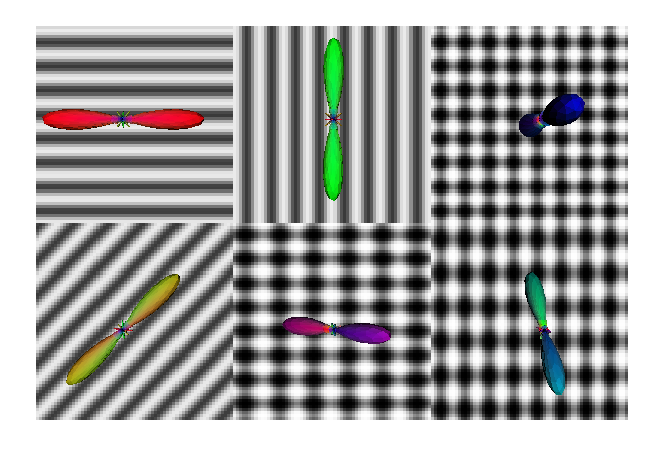

In [9]:
from fiberorient.vis import show_odf_img_2D

show_odf_img_2D(odf_array,sphere,phantom[...,10],
                min_pix=2000,
                out_path='odf_overlay.png')
im = plt.imread('odf_overlay.png')
plot_image(im);